# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 50 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 30 баллов
* Задача 4 &mdash; 20 баллов





-----

In [13]:
# Bot check

# HW_ID: phds_hw4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    recall_score,
    precision_score,
)
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GroupShuffleSplit

import warnings
import seaborn as sns

sns.set_theme(palette="Set2")
warnings.filterwarnings("ignore")

#### <b><font color="blue">Легкая часть</font></b>

### Задача 1


#### 1. Загрузка данных и предобработка

#### *Профиль биология*

Загрузите [данные](https://miptstats.github.io/courses/ad_mipt.html) по предсказанию рака груди. Поодробнее о них можно почитать в [источнике](https://www.kaggle.com/datasets/marshuu/breast-cancer).


In [12]:
data = pd.read_csv("breast_cancer.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'breast_cancer.csv'

Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [ ]:
<...>

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.groupby("Class")["Bare Nuclei"].hist(ax=axs[0], alpha=0.5)
data.groupby("Class")["Bare Nuclei"].plot(kind="kde", ax=axs[1])
axs[0].set_title("Гистограмма для Bare Nuclei", fontsize=20)
axs[1].set_title("KDE для Bare Nuclei", fontsize=20)

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:**

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** <...>

**Это не конец задачи! Переходите к пункту 2!**

#### *Профиль физика*

Загрузите данные по бинарной классификации астероидов в зависимости от различных параметров с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>.

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data). Можно заметить, что наш датасет сильно меньше по размерам, чем оригинал. Это сделано намеренно.

In [2]:
data = pd.read_csv("asteroid_cut.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pha             951 non-null    object 
 1   diameter        951 non-null    float64
 2   albedo          951 non-null    float64
 3   diameter_sigma  951 non-null    float64
 4   epoch           951 non-null    float64
 5   epoch_mjd       951 non-null    int64  
 6   epoch_cal       951 non-null    float64
 7   i               951 non-null    float64
 8   om              951 non-null    float64
 9   w               951 non-null    float64
 10  ma              951 non-null    float64
 11  ad              951 non-null    float64
 12  tp              951 non-null    float64
 13  tp_cal          951 non-null    float64
 14  sigma_e         951 non-null    float64
 15  sigma_a         951 non-null    float64
 16  sigma_q         951 non-null    float64
 17  sigma_i         951 non-null    flo

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `rms` для разных классов:

Text(0.5, 1.0, 'KDE для rms')

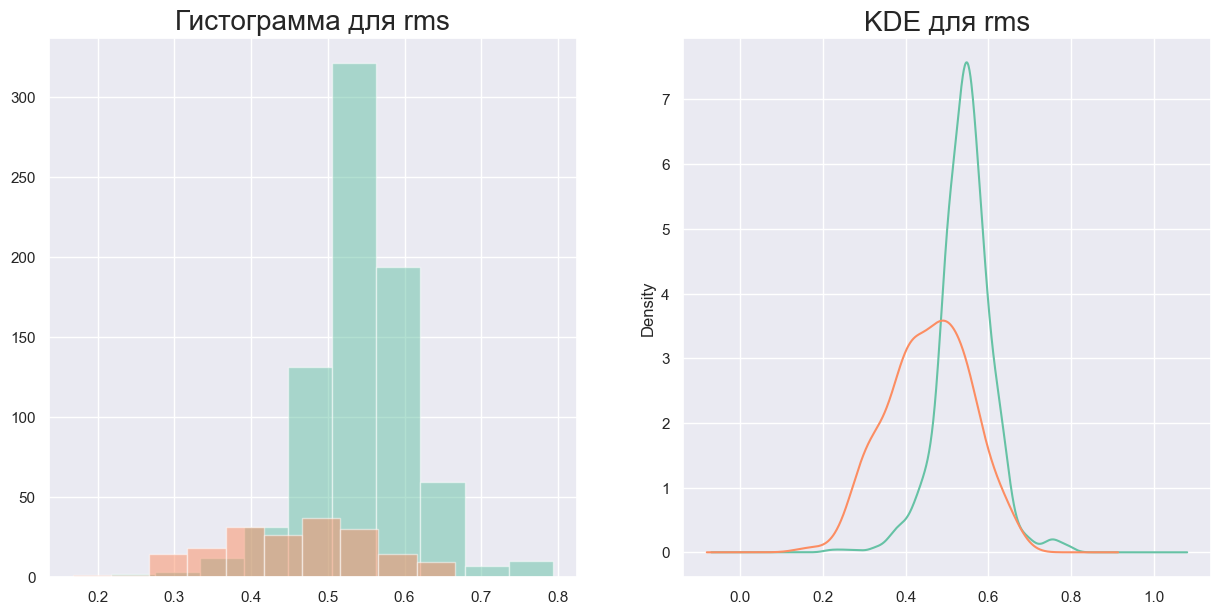

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")["rms"].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")["rms"].plot(kind="kde", ax=axs[1])
axs[0].set_title("Гистограмма для rms", fontsize=20)
axs[1].set_title("KDE для rms", fontsize=20)

Чем отличаются способы построения ЯОП и гистограммы? Какую информацию о наших данных можно извлечь из каждого графика?

**Ответ:** При построении яоп суммируются гладкие ядра (какие, зависит от желаний пользователя), а при построении гистограммы -- ступеньки. Поэтому гисограмма не гладкая, а ЯОП -- гладкая. По идее, ядерная оценка быстрее сходится к истинной функции распределения, чем гистограмма. Также, для построения достаточно качественной (дитализированной) гистограммы требуется достаточная мелкость корзин, что в свою очередь приводит к необходимости иметь большое количество даннях. А их может быть не всегда много. Тогда гистограмма получается малоинформативной. Однако, при построении ЯОП можно ощибиться с выбором суммируемого ядра, что тоже негативно сказывается на итоговом результате.

Смотря на графики, можно заметить, что распределение rms для отрицательного класса более острое, чем для положительного. Также и его дисперсия явно меньше. Ещё по гистограмме можно заключить, что положительный класс представлен сильно меньше, чем отрицательный.

Постройте гистограммы и ядерные оценки плотности для указанных ниже признаков отдельно для каждого класса. `Class` — целевая переменная. Можно это сделать, опираясь на код выше, а можно воспользоваться параметром `hue` у функции [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html) или другим методом, который вам нравится. Не забывайте подписывать, к чему относится каждый график.

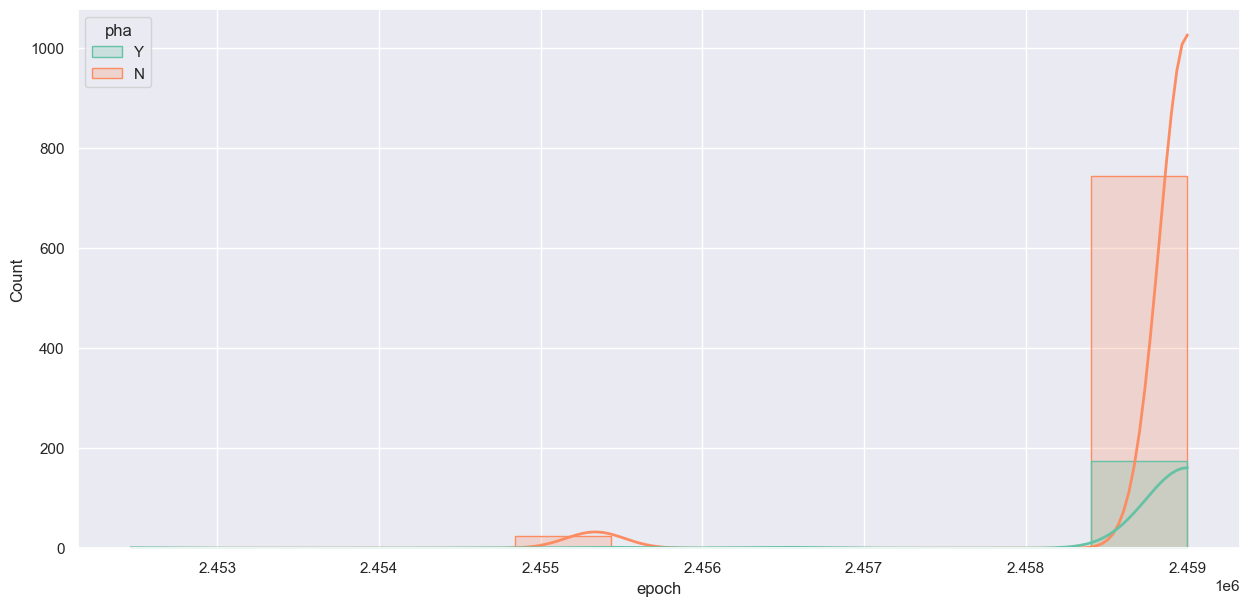

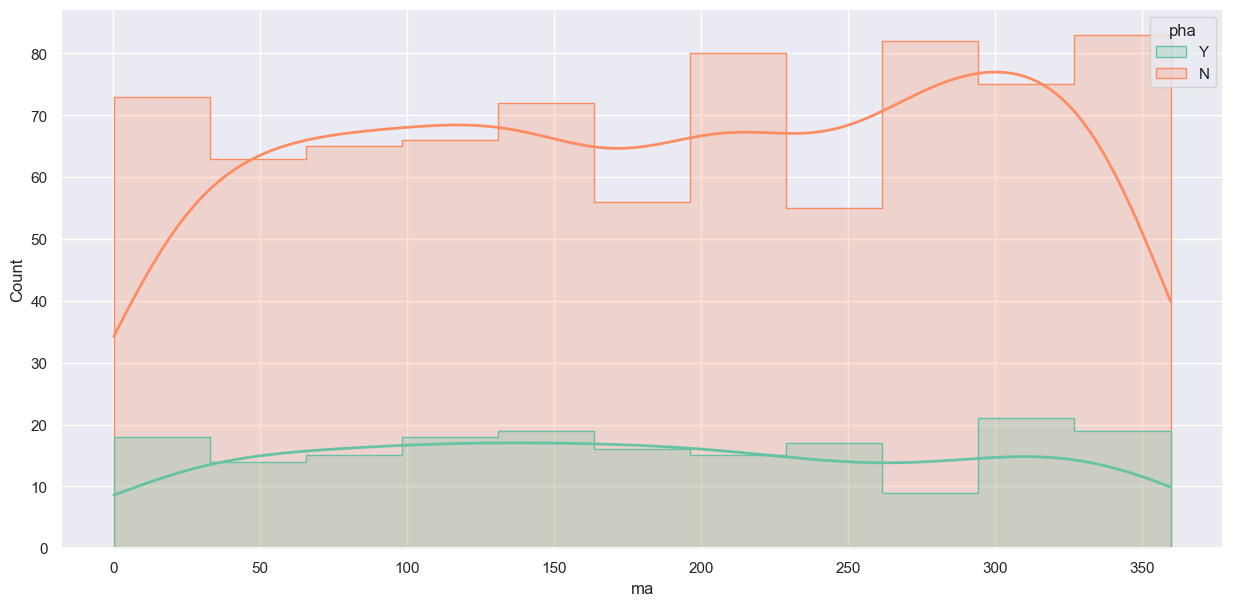

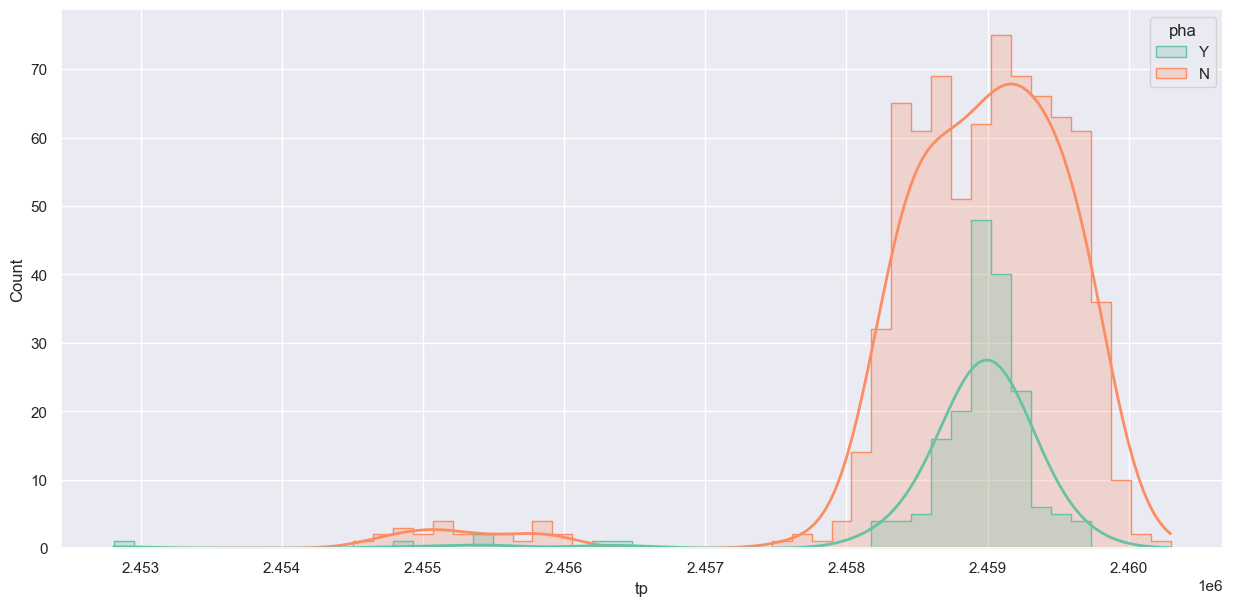

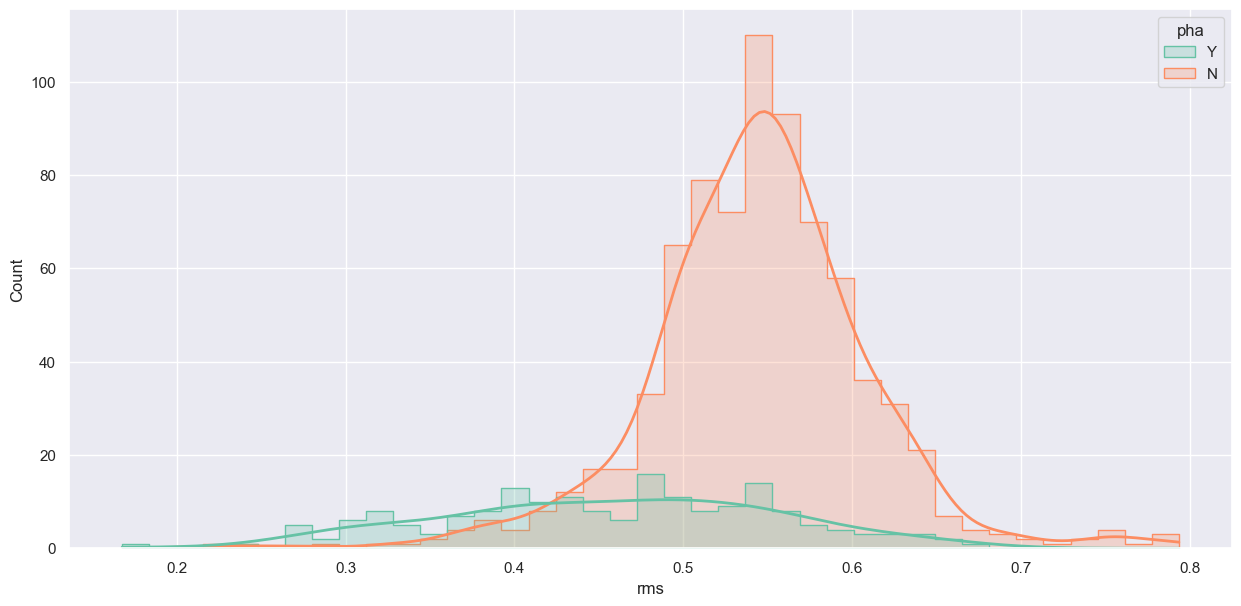

In [4]:
features = ["epoch", "ma", "tp", "rms"]
for f in features:
    fig, axs = plt.subplots(1, 1, figsize=(15, 7))
    sns.histplot(
        data,
        x=f,
        hue="pha",
        element="step",
        kde=True,
        line_kws={"linewidth": 2, "alpha": 1},
    )

Какие выводы вы можете сделать из полученных графиков?

**Вывод:** Выглядит так, что остальные параметры (кроме rms) распределены почти одинаково для разных классов (пик находится примерно на одном и том же значении).  

#### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.


In [5]:
X = data.drop("pha", axis=1)
y = data["pha"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Объясните, что делает `StandardScaler` и почему его нельзя обучать на тестовой выборке?

**Ответ:** Предобработка данных: центрирование и нормализация. Нельзя обучать на тестовой, потому что это может привести к протечке данных и исказить результаты работы модели на тестовых данных.

Обучите модель логистической регрессии.

In [8]:
model = LogisticRegression(fit_intercept=True)

model.fit(X_train, y_train)

LogisticRegression()

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания, рассмотрите метрики: `accuracy_score`, `precision` и `recall`.

Если названия ваших классов отличаются от 0 и 1, то надо использовать аргумент `pos_label`.

In [9]:
y_pred = model.predict(X_test)

print("Метрики для большого класса")
print(
    f"precision:\t{precision_score(y_pred, y_test, pos_label='N')}\nrecall:\t\t{recall_score(y_pred, y_test, pos_label='N')}"
)

print("\nМетрики для маленького класса")
print(
    f"precision:\t{precision_score(y_pred, y_test, pos_label='Y')}\nrecall:\t\t{recall_score(y_pred, y_test, pos_label='Y')}\n\naccuracy:\t{accuracy_score(y_pred, y_test)}"
)

Метрики для большого класса
precision:	0.9786324786324786
recall:		0.9662447257383966

Метрики для маленького класса
precision:	0.8461538461538461
recall:		0.8979591836734694

accuracy:	0.9545454545454546


Можем ли порадоваться таким результатам? Вернемся к гистограммам и сделаем вывод, почему метрики оказались такими большими. 

#### 3. Учтём дисбаланс классов
Давайте посмотрим на распределение наших данных по целевой переменной по всему датасету, тренировочной и тестовой выборках:

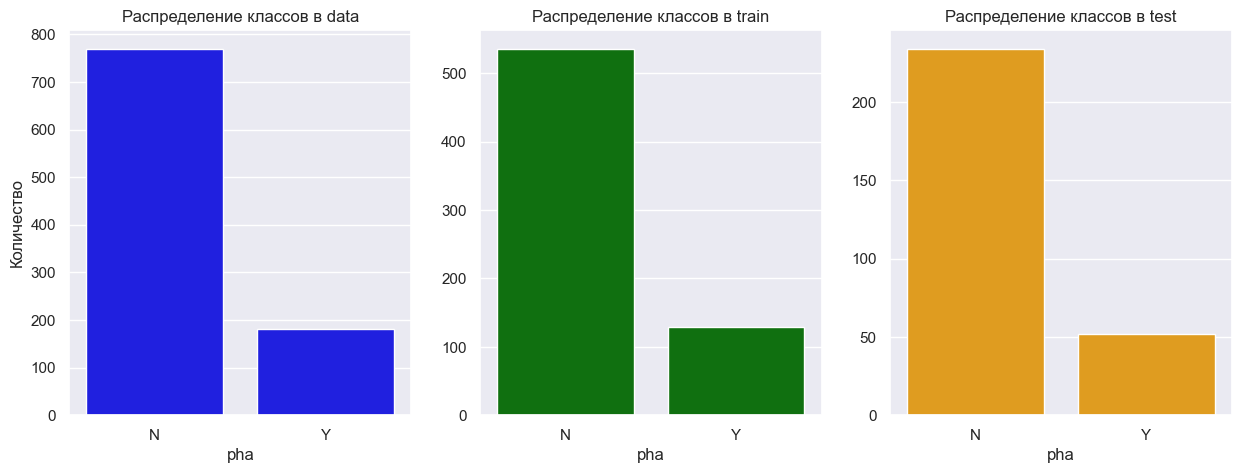

In [10]:
original = y.value_counts()  # Колонка таргета из изначального датасета
train = y_train.value_counts()  # Колонка таргета из тренировочного датасета
test = y_test.value_counts()  # Колонка таргета из тестового датасета

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(x=original.index, y=original.values, ax=axes[0], palette=["blue"])
axes[0].set_title("Распределение классов в data")
axes[0].set_ylabel("Количество")

sns.barplot(x=train.index, y=train.values, ax=axes[1], palette=["green"])
axes[1].set_title("Распределение классов в train")

sns.barplot(x=test.index, y=test.values, ax=axes[2], palette=["orange"])
axes[2].set_title("Распределение классов в test")

plt.show()

Видно, что в данных есть сильный перекос — классы представлены неравномерно. Как и почему это повлияло на наши результаты?

**Ответ:** Видимо, из-за количества негативных объектов и малого количества позитивных больщой вклад в лосс идёт со стороны одного из классов (суммарный вклад в ошибку негативного класса больше получается), он как бы перетягивает на себя одеяло, сдвигает границу к себе, то есть модель сильно боиться ошибиться с классификацией объектов этого класса и слабо -- с классификацией объектов из малого класса.

Есть много способов борьбы с этим. Можно искусственно сгенерировать данные нужного класса или урезать другой класс. Однако сегодня мы воспользуемся ***взвешенной*** логистической регрессией. Суть метода заключается в том, чтобы вручную поставить веса для классов, исходя из их предполагаемой природы: важность разных классов, цена ошибки в реальной жизни (например, что хуже: предсказать наличие рака, если он есть или нет?) и представленность данных.

Функция потерь &mdash; в нашем случае логарифм функции правдоводобия &mdash; для взвешенной логистической регресси будет записана как:

$$
L(y, \widehat{y}) = \sum_{i=1}^{N} w_{y_i} \cdot \left[ y_i \cdot \log(\sigma(\widehat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\widehat{y}_i)) \right]
$$

где:


- $ y_i $ - истинный класс для образца  $i$
- $ \widehat{y}_i $ - предсказанный класс для образца $i$
- $ w_{y_i} $ - вес класса



Давайте реализуем этот метод. Допишите код и в качестве весов класса  поставьте соотношение их представленности. Выведите подсчет количества экземпляров каждого класса и посчитайте их соотношение.

In [11]:
threshold = sum(y == "Y") / sum(y == "N")


class_weights = {"N": threshold, "Y": 1 - threshold}

# если использовать class_weights = 'balanced', модель сама подсчитает веса


weighted_model = LogisticRegression(class_weight=class_weights)

Посчитайте метрики качества. `Accuracy` посчитайте двумя способами: без учёта и [с учётом весов](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html). 

In [12]:
weighted_model.fit(X_train, y_train)
y_pred = weighted_model.predict(X_test)

In [13]:
print(f"accuracy with weights\t=\t{balanced_accuracy_score(y_test, y_pred)}")
print(
    f"accuracy\t\t=\t{accuracy_score(y_test, y_pred)}\nprecision\t\t=\t{precision_score(y_test, y_pred, pos_label='Y')}\nrecall\t\t\t=\t{recall_score(y_test, y_pred, pos_label='Y')}"
)

accuracy with weights	=	0.9134615384615385
accuracy		=	0.9440559440559441
precision		=	0.8333333333333334
recall			=	0.8653846153846154


Как изменилось качество нашей модели? Почему надо учитывать несбалансированность данных?

Сделайте общий вывод по задаче.

**Вывод:** У меня ощущение, что я сделал что-то не так, потому что метрики почти не поменялись, может, даже слегка ухудшились(

### Задача 2




Вам предлагается изучить и сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; `Lasso`, `Ridge`, `Elastic Net`.  

При выполнении задания воспользуйтесь готовыми реализациями методов в `sklearn`. Функции, описанные ниже, пригодятся вам во втором пункте этого задания.

In [14]:
def calculate_coef(model, X, y, log_min, log_max, num):
    """
    Данная функция считает коэффициенты для признаков
    при различных значениях параметра регуляризации.

    :param model: регрессионная модель
    :param X: матрица регрессоров
    :param y: вектор целевой переменной
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона

    :return coefs: коэффициенты модели
    """

    alphas = np.logspace(log_min, log_max, num)  # сетка параметров
    coefs = []  # коэффициенты моделей
    for a in alphas:
        if "l1_ratio" in model.get_params():  # для ElasticNet
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3 / 2
            model.set_params(alpha=a)  # переопределяем параметры модели
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        # отбираем только первые 20 признаков для ускорения работы кода
        coefs.append(model.coef_[:20])
    return coefs


def draw_track(coefs, log_min, log_max, num, title="", figsize=(10, 5)):
    """
    Данная функция строит график зависимости значений
    коэффициентов модели от параметра регуляризации.

    :param coefs: коэффициенты модели
    :param log_min, log_max: логарифмы левой и правой границ диапазона для коэффициента регуляризации
    :param num: число точек из диапазона
    :param title: название графика
    :param figsize: размеры рисунка

    :return coefs: коэффициенты модели
    """
    alphas = np.logspace(log_min, log_max, num)  # сетка параметров

    plt.figure(figsize=figsize)
    ax = plt.gca()  # используется для получения текущего экземпляра axes
    ax.hlines(0, 10**log_min, 10**log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r"$\theta_{" + str(ind) + "}$"
        ax.plot(
            alphas, coef, linewidth=2, label=label
        )  # рисуем коэффициенты в зависимости от alpha
        ind += 1

    ax.set_xscale("log")  # логарифмическая шкала
    ax.set_xlim(ax.get_xlim()[::-1])  # обратить ось
    plt.xlabel("Параметр регуляризации", fontsize=19)
    plt.ylabel("Значения коэффициентов", fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper left", fontsize=8)
    plt.axis("tight")
    plt.show()

#### 1. Загрузка данных

#### *Профиль биология*

Скачайте данные с [сайта](https://miptstats.github.io/courses/ad_mipt.html). Оригинал вместе с описанием можно найти [здесь](https://archive.ics.uci.edu/ml/datasets/Parkinsons+Telemonitoring). Сами данные лежат в `Data Folder`. Файл `.data` можно читать с помощью `read_csv`. В этой задаче мы хотим предсказать уровень выраженности болезни Паркинсона в зависимости от параметров речи пациента. В датасете есть записи о 42 пациентах, для каждого некотрое количество записей. 

In [15]:
data = pd.read_csv("parkinsons_updrs.data", sep=",")
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'parkinsons_updrs.data'

Нас интересует предсказание `total_UPDRS` &mdash; степени заболевания. Для корректной постановки задачи удалите из данных столбец `motor_UPDRS`, так как это тоже мера тяжести заболевания, но лишь в аспекте моторных нарушений. Будем предсказывать значение `total_UPDRS` в зависимости от остальных признаков. 

Также обратите внимане, что в данных есть группы (пациенты). Колонку `subject#` следует использовать не в качестве признака, а в качестве группы. Разделите данные на признаки $X$, таргет $y$ и массив номеров групп.

In [ ]:
<...>

Разбейте данные на обучающую и тестовую выборки в соотношении 7:3. Здесь не подойдет стандартный метод `test_train_split`, так как в данных есть группы. *Нельзя допускать, чтобы разные записи для одного пациента попали в разные подвыборки*.

**Также, выведите что-либо, подтверждающее данное свойство.**



In [ ]:
groups = data["subject#"]
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(gss.split(X, y, groups=groups))
<...>

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку. 

**Переходите к пункту 2.**

#### *Профиль физика*

Загрузите данные с <a href="https://miptstats.github.io/courses/ad_mipt.html">сайта</a>. Данные были предобработаны и сокращены для более быстрой работы алгоритмов предсказания, так как в этом задании их будет большое кол-во. С исходными данными вы можете ознакомиться <a href="https://www.kaggle.com/datasets/burakhmmtgl/energy-molecule">здесь</a>.

В таблице находятся записи в кулоновской матрице в сжатом виде, которые действуют как молекулярные признаки. 0-я колонка — это Pubchem Id, по этому числу вы можете понять, для какой молекулы приведены числа. Этот столбец возьмем в качестве индекса строк. Последний столбец `Eat` — это энергия распыления, рассчитанная путем моделирования с использованием пакета Quantum Espresso. Этот столбец и является целевой переменной.

*Для интересующихся: cнижение размерности пространства признаков проводилось с помощью <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">метода главных компонент</a>*.

In [16]:
data = pd.read_csv("physics_data.csv", index_col=0)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Eat
pubchem_id,,,,,,,,,,,,,,,,,,,,,
25004,-54.825075,-0.835719,45.240515,-22.585658,1.450320,-16.223986,12.376342,13.424011,-4.923189,-2.653680,...,-0.028997,-0.023466,-0.066633,0.030779,-0.036064,-0.008572,0.011805,-0.036215,0.052180,-19.013763
25005,-34.039832,24.930703,-7.485562,40.737762,21.400170,15.280596,4.467203,-19.296032,-0.433598,18.387221,...,-0.006840,-0.000419,0.003369,-0.000641,-0.001035,0.012597,0.004377,0.004023,0.003356,-10.161019
25006,-58.794258,-49.823448,-35.062080,1.698937,-18.012227,12.523468,9.210336,7.488163,11.392693,-0.927953,...,-0.004305,-0.003377,-0.003500,0.002734,-0.001017,0.004774,0.012796,0.022270,0.008051,-9.376619
25009,-38.508716,19.211767,-4.858507,10.484105,16.622411,-22.131178,-14.876963,-5.516521,13.793978,3.657935,...,0.028996,-0.001423,-0.000576,0.011144,-0.007253,-0.006700,-0.007940,0.022492,-0.007016,-13.776438
25011,-45.432604,-23.951574,-55.340413,-7.879883,-16.304009,13.340896,11.326496,6.784151,11.208725,-0.181278,...,0.004552,0.008307,-0.003005,0.000816,-0.000938,0.001135,-0.005256,0.001042,0.002651,-8.537140


Разделите данные на признаки $X$ и целевые переменные $y$. **Для дальнейших заданий оставьте 20 признаков.**

In [17]:
X = data.drop("Eat", axis=1).iloc[:, :20]
y = data["Eat"]

Разделите выборку в отношении 7:3. Далее везде, вплоть до сравнения моделей, используйте обучающую выборку.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

In [19]:
not_scale_data = [X_train, X_test, y_train, y_test]

Далее везде, вплоть до сравнения моделей в задаче 3, используйте обучающую выборку. 


#### 2. Влияние регуляризации на коэффициенты моделей

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>.

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Используйте функции `calculate_coefs` и `draw_track`, реализованные в самом начале этой задачи.

Нарисуйте графики. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

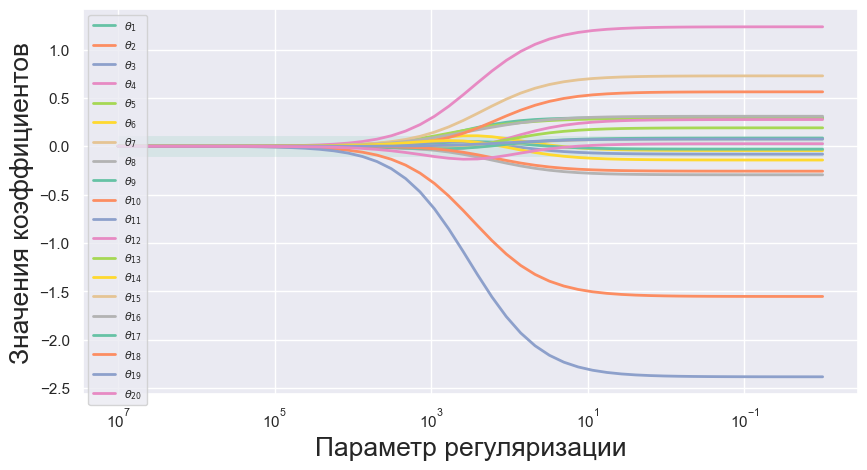

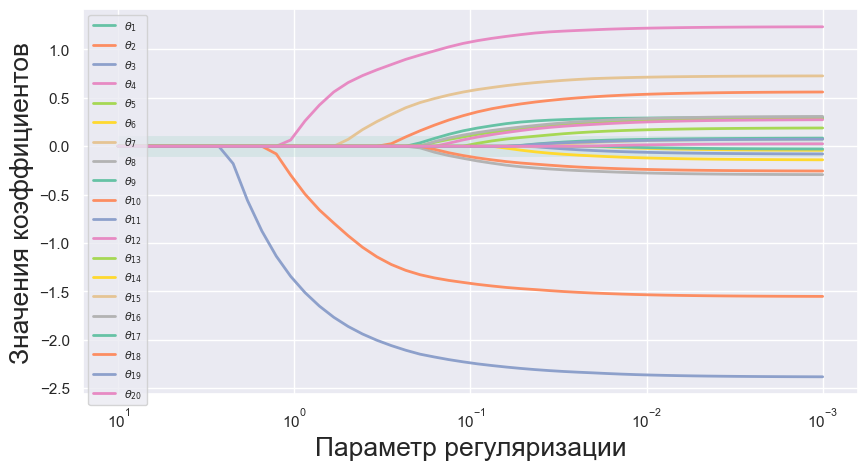

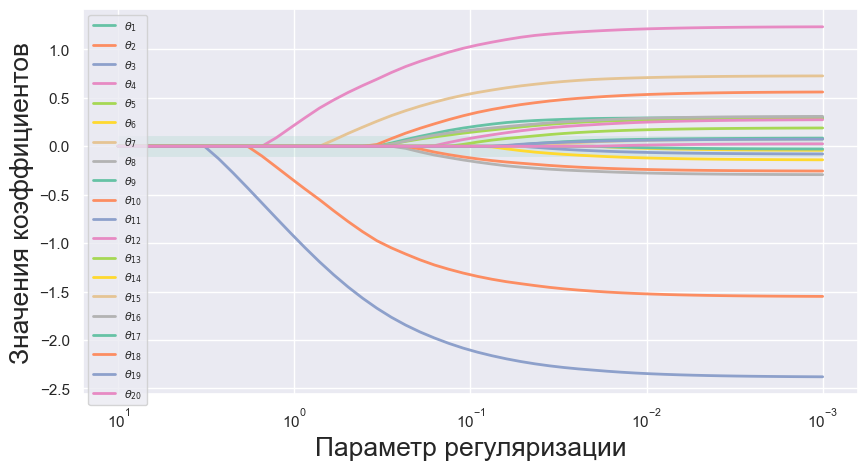

In [22]:
# Ridge регрессия
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_logspace = [-2, 7, 50]
ridge_coefs = calculate_coef(ridge_model, X_train, y_train, *ridge_logspace)
draw_track(ridge_coefs, *ridge_logspace)


# Lasso регрессия
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

lasso_logspace = [-3, 1, 50]
lasso_coefs = calculate_coef(lasso_model, X_train, y_train, *lasso_logspace)
draw_track(lasso_coefs, *lasso_logspace)


# Elastic регрессия
elastic_model = ElasticNet()  # установите какое-то значение l1_ratio
elastic_model.fit(X_train, y_train)

elastic_logspace = [-3, 1, 50]
elastic_coefs = calculate_coef(elastic_model, X_train, y_train, *elastic_logspace)
draw_track(elastic_coefs, *elastic_logspace)

**Ответ:** Оптимальный параметр, видимо, необходимо искать в диапазоне значений, где он как-то влияет на коэффициенты. При слишком больших его значениях все коэффициенты моделей зануляются -- слишком сильно за это мы штрафуем модель. При слишком малых значениях параметра значения коэффициентов выходит на плато, то есть коэффициент перестал хоть как то влиять на значения коэффициентов. 

Для лассо же и эластика, которые умеют занулять коэффициенты оптимум параметра нужно искать в том месте, где занулилась только основная часть коэффициентов. Возможно это как раз момент, когда мы смогли загасить влияние линейно зависимых или малозначимых признаков. Но в этом я не уверен. Если же линейно зависимых признаков у нас нет, то диапазон поиска чуть шире -- там, где значения коэффициентов ещё не выщли на плато или не обратились в ноль. 

То есть для 

Ridge   --  $[10^4; 10]$

Lasso   --  $[~1; 10^{-1}]$ или $[1; 10^{-2}]$
            
Elastic --  $[~1; 10^{-1}]$ или $[1; 10^{-2}]$

Посмотрите, как выглядят графики без стандартизации. Почему так происходит?

In [23]:
X_train, X_test, y_train, y_test = not_scale_data

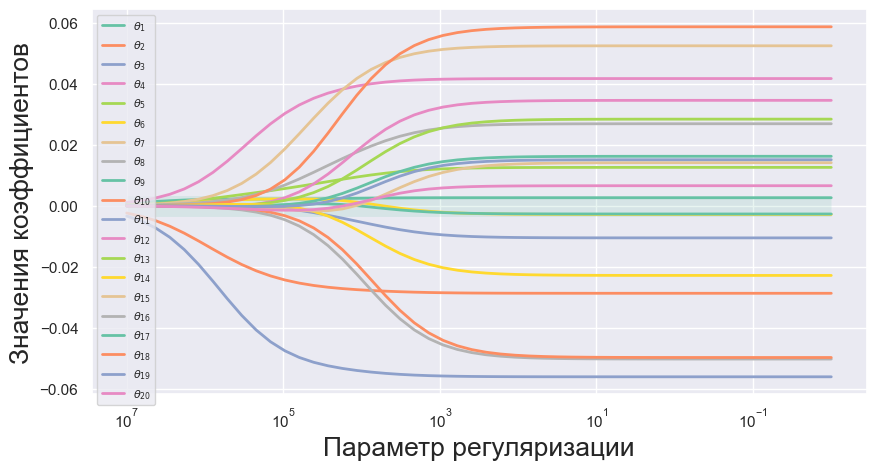

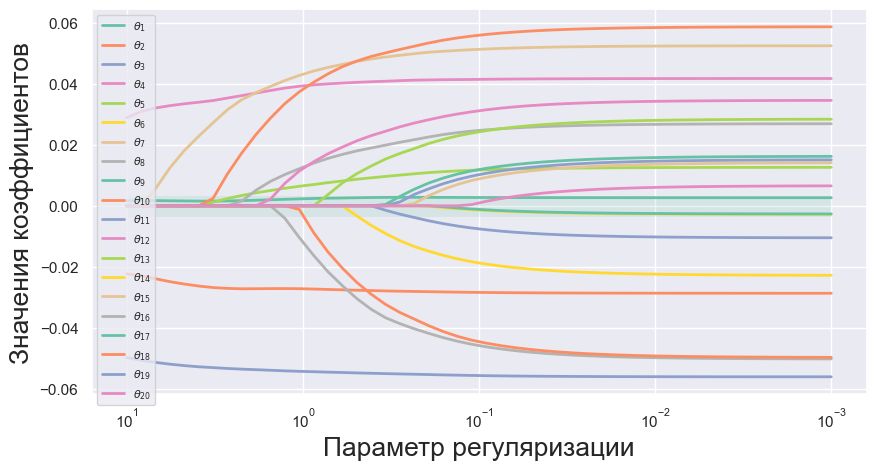

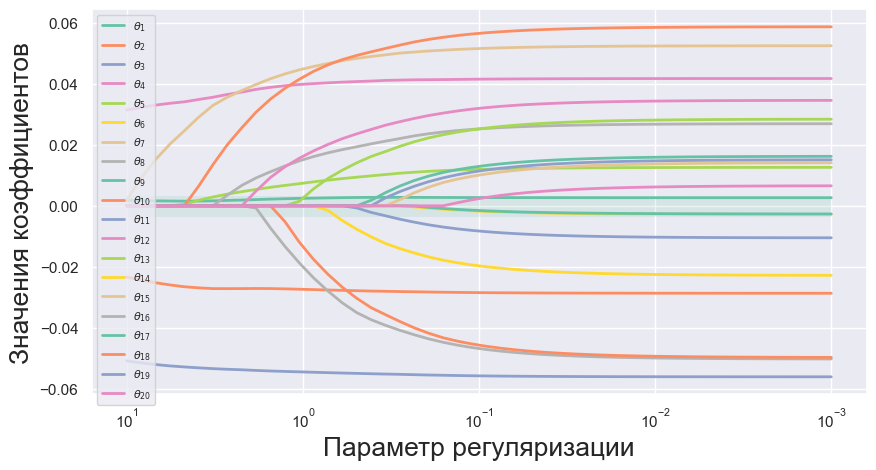

In [24]:
# Ridge регрессия
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

ridge_logspace = [-2, 7, 50]
ridge_coefs = calculate_coef(ridge_model, X_train, y_train, *ridge_logspace)
draw_track(ridge_coefs, *ridge_logspace)


# Lasso регрессия
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

lasso_logspace = [-3, 1, 50]
lasso_coefs = calculate_coef(lasso_model, X_train, y_train, *lasso_logspace)
draw_track(lasso_coefs, *lasso_logspace)


# Elastic регрессия
elastic_model = ElasticNet()  # установите какое-то значение l1_ratio
elastic_model.fit(X_train, y_train)

elastic_logspace = [-3, 1, 50]
elastic_coefs = calculate_coef(elastic_model, X_train, y_train, *elastic_logspace)
draw_track(elastic_coefs, *elastic_logspace)

**Ответ:** Коэффициенты стали на порядок меньше и при увеличении параметра сходятся к нулю дольше. После нормализации данных они стали меньше по модулю и коэффициенты из-за этого стали побольше. Хотел что-то сказать про число обусловленности дизайн матрицы, но не вижу, чтобы оно тут как-то проявляло себя. Видимо не было здесь мультиколлинеарности. Ещё тут линии для разных весов стали перепутываться с ростом параметра, но почему так, я не понимаю. Видимо, это тоже из-за отсутствия стандартизации. Возможно, это можно интерпретировать так: чем больше коэффициент, тем "важнее" соответствующий признак, если мы данные нормализовали, то на "скорость" зануления признака влияет только его "важность". Поэтому сначала зануляются самые "бесполезные" признаки, а далее -- всё более значимые. А без нормализации на "скорость" зануления начинает влиять ещё и абсолютная или относительная величина этого признака, поэтому менее значимые признаки могут занулиться позже более значимых. Тут "позже" или "раньше" имеется ввиду по параметру.

#### <b><font color="orange">Сложная часть</font></b>
### Задача 3


Эта задание является продолжением предыдущего. Здесь не нужно загружать новые данные, продолжайте работать с выбранными вами данными.

**1.** Для Elastic исследуйте зависимость от параметра `l1_ratio`. Постройте график изменения весов признаков в зависимости от `l1_ratio` для первых 20 признаков из датасета. 

In [25]:
# снова нормализуем данные
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

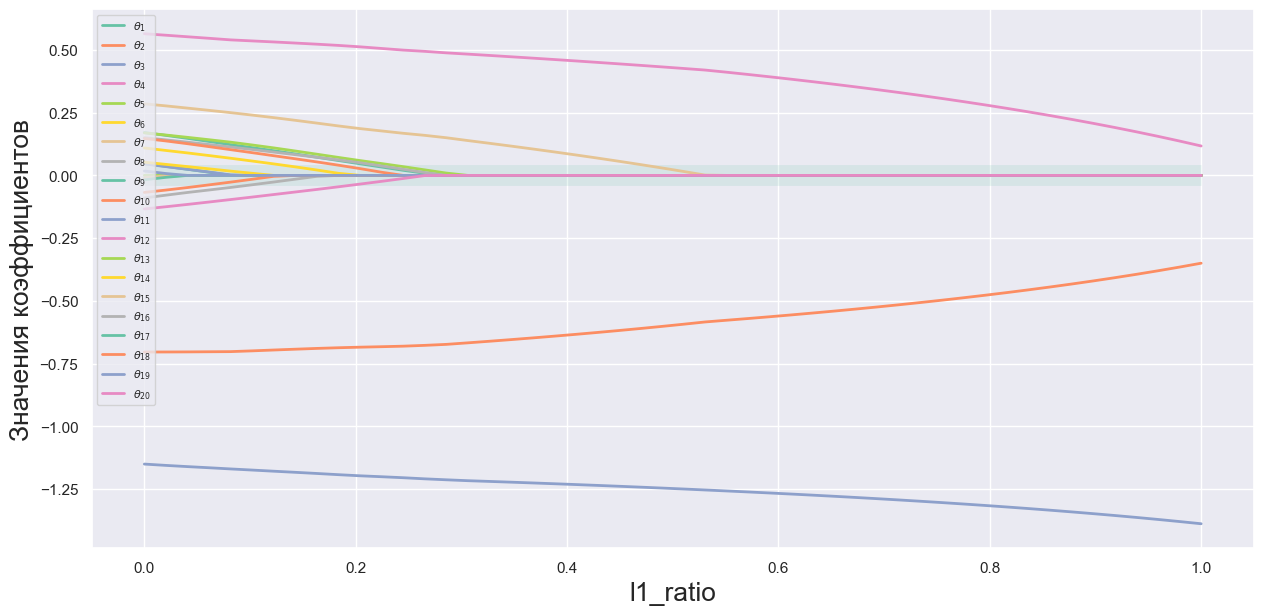

In [26]:
grid = np.linspace(0, 1, 50)

model = ElasticNet(l1_ratio=0)
model.fit(X_train, y_train)
coefs = [[] for c in model.coef_]

for l1_ratio in grid:
    model = ElasticNet(l1_ratio=l1_ratio)  # Задайте новый параметр модели
    model.fit(X_train, y_train)  # Обучите
    for i, c in enumerate(model.coef_):
        coefs[i].append(c)

# Для визуализации можно использовать код из функции draw_track\
plt.figure(figsize=(15, 7))
ax = plt.gca()  # используется для получения текущего экземпляра axes
ax.hlines(0, 0, 1, linewidth=15, alpha=0.15)
ind = 1
for coef in coefs:
    label = r"$\theta_{" + str(ind) + "}$"
    ax.plot(
        grid, coef, linewidth=2, label=label
    )  # рисуем коэффициенты в зависимости от alpha
    ind += 1

plt.xlabel("l1_ratio", fontsize=19)
plt.ylabel("Значения коэффициентов", fontsize=19)
plt.legend(loc="upper left", fontsize=8)
plt.axis("tight")
plt.show()

Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

**Вывод:** Видно, что при l1 ratio равном нулю коэффициенты не зануляются, а при отличном от нуля начинают зануляться. Похоже, этот коэффициент перемещает нас от одной модели к другой -- от Ridge к Lasso. Если мы не ожидаем мультиколлинеарности в нашей задаче, то, видимо, Ridge регрессия будет предпочтительнее. То есть стоит выбирать этот коэффициент в области около нуля, пока не все коэффициенты занулились.
 

**2.** Проиллюстрируйте, как меняется качество предсказания моделей при изменении параметра `alpha`. Возьмите `Ridge`, `Lasso` и 3 `ElasticNet` с разными фиксированными значениями `l1_ratio` &mdash; вы будете исследовать 5 моделей с регуляризацией и 1 без нее.

***Физика:*** Для этого задания возьмите полный датасет &mdash; все 300 признаков.

In [36]:
X = data.drop("Eat", axis=1)
y = data["Eat"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=42
)

In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Сначала посчитайте ошибки для линейной регрессии без регуляризации.

In [38]:
linreg_model = LinearRegression(fit_intercept=True)
linreg_model.fit(X_train, y_train)
y_pred = linreg_model.predict(X_test)

In [39]:
linreg = {}
linreg["MSE"] = mean_squared_error(y_test, y_pred)
linreg["MAE"] = mean_absolute_error(y_test, y_pred)
linreg["MAPE"] = mean_absolute_percentage_error(y_test, y_pred)
linreg

{'MSE': 169.75661249153794,
 'MAE': 4.158162685181332,
 'MAPE': 0.28931735050733837}

Допишите функцию для отрисовки изменения величины ошибки от параметра регуляризации. 

In [84]:
def draw_errors(error, error_name, alphas):

    """
    Функция строит график зависимости величины ошибки от параметра alpha для разных моделей
    
    :param error: функция, вычисляющая ошибку
    :param error_name: имя функции, вычисляющей ошибку (одно из 'MSE', 'MAE', 'MAPE')
    :param alphas: массив величин alpha
    """
    arr = [] # массив ошибок
    for a in alphas:
        tmp = [] # массив ошибок
        models = [Lasso(alpha=a).fit(X_train, y_train),
                  Ridge(alpha=a).fit(X_train, y_train),
                  ElasticNet(alpha=a, l1_ratio=0).fit(X_train, y_train),
                  ElasticNet(alpha=a, l1_ratio=0.1).fit(X_train, y_train),
                  ElasticNet(alpha=a, l1_ratio=0.5).fit(X_train, y_train),
                  ]
        for model in models:
            
            # обучение модели и предсказание 
            y_pred = model.predict(X_test)
            tmp.append(error(y_test, y_pred))
        arr.append(tmp)

    arr = np.array(arr)
    plt.figure(figsize=(10, 6), dpi=100)

    names = ["Lasso", "Ridge", "Elastic_0", "Elastic_0.1", "Elastic_0.5"]
    for i in range(5):
        plt.plot(alphas, arr[:, i], label=names[i]) # рисуем ошибки в зависимости от alpha

    # прерывистой линией рисуем ошибки логрега без регуляризации
    plt.hlines(linreg[error_name], alphas[0], alphas[-1], color='black', label = 'No regularization', linestyles='dashed')
    plt.xlabel('Параметр регуляризации')
    plt.ylabel(error_name)
    plt.xscale('log')
    plt.legend()

Постройте графики для MSE, MAE и MAPE. Возьмите предложенный массив `alphas`.

In [85]:
alphas = np.logspace(-2, 8, 20)

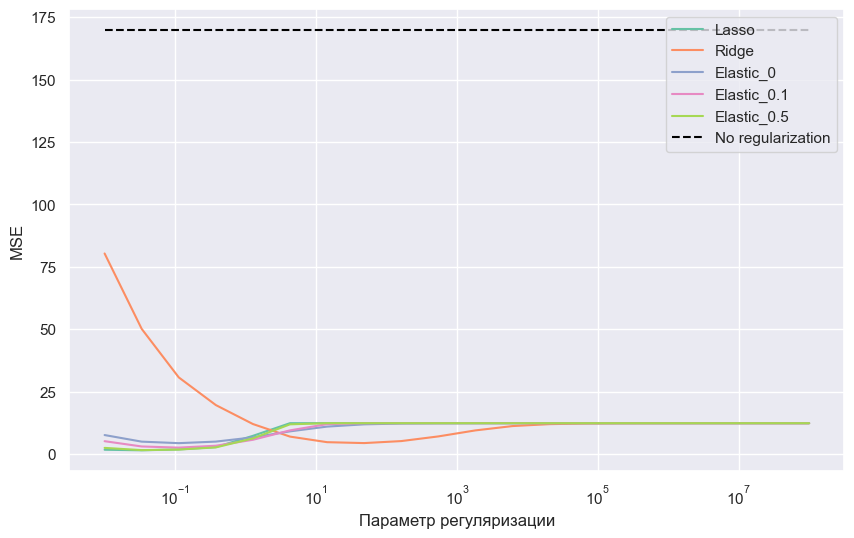

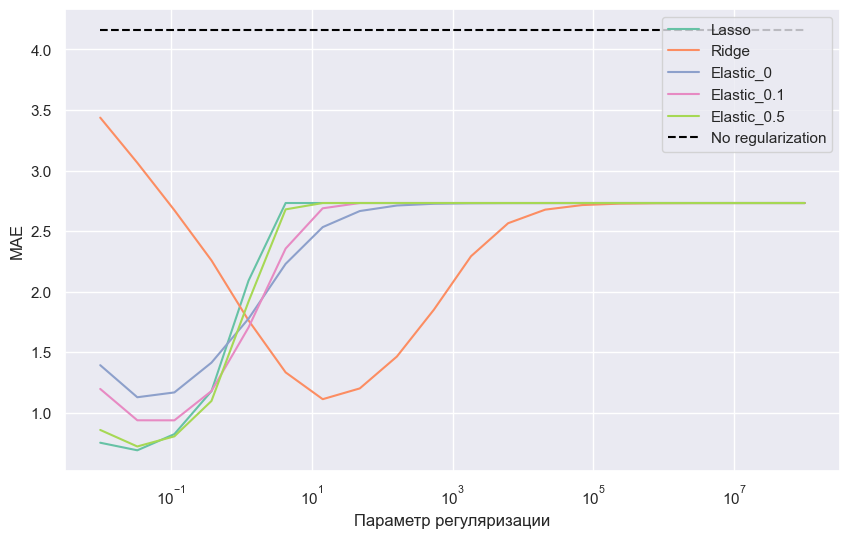

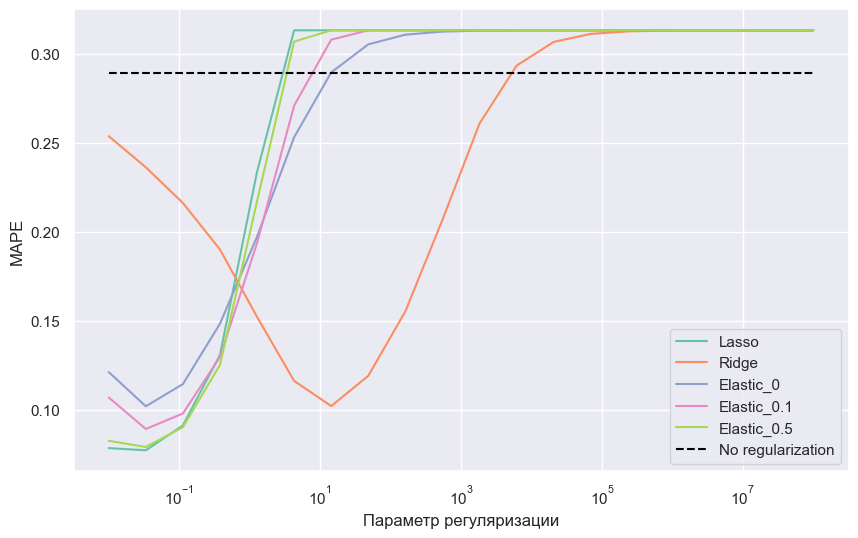

In [86]:
# вложите в функции метрики
draw_errors(mean_squared_error, "MSE", alphas)
draw_errors(mean_absolute_error, "MAE", alphas)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas)

Оцените по графикам, в каких диапазонах достигается наилучшее качетсво предсказания моделей. Постройте графики для более узкого диапазона, чтобы сравнить модели более детально.

In [92]:
alphas = np.logspace(-2, 3, 20)

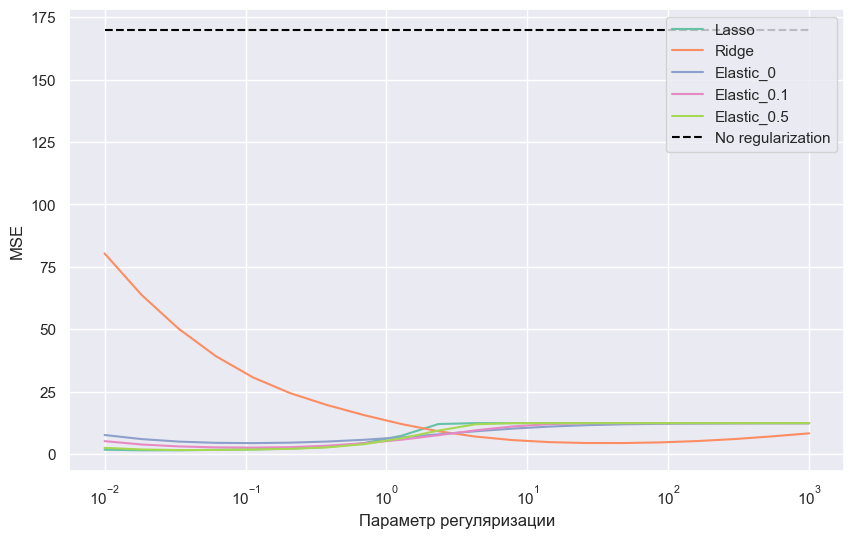

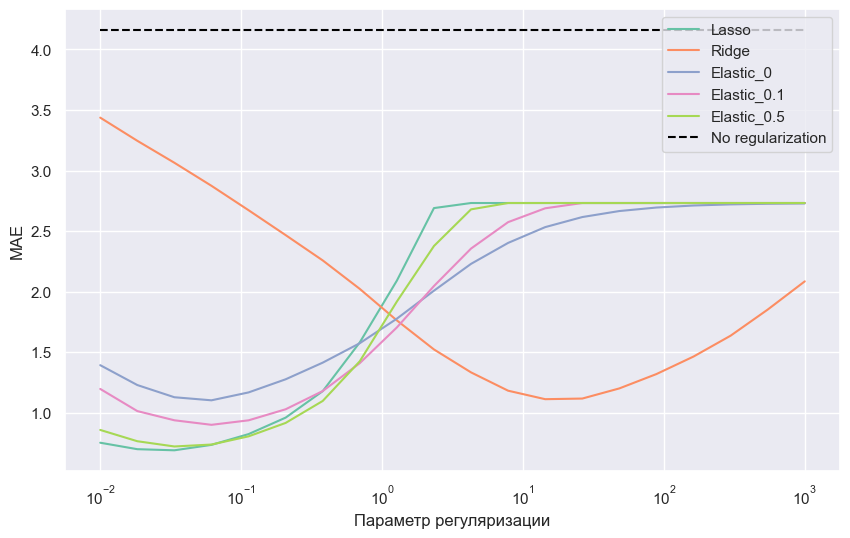

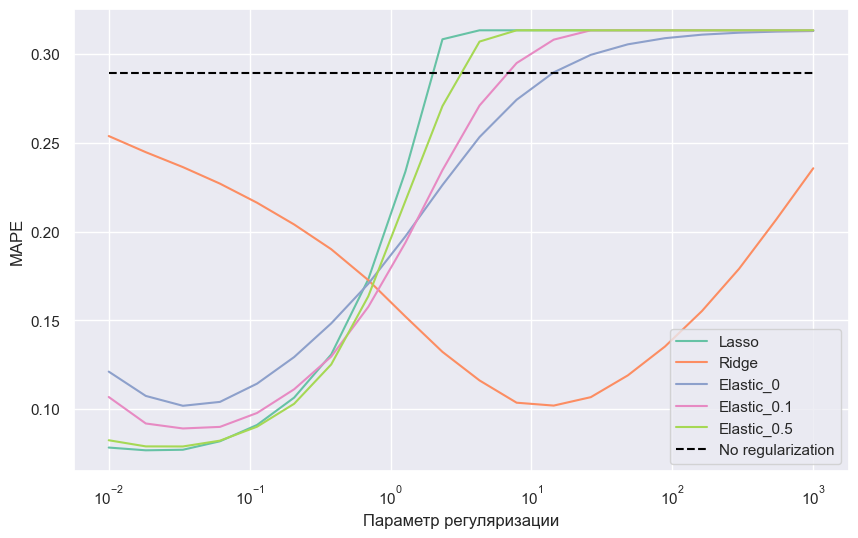

In [93]:
# вложите в функции метрики
draw_errors(mean_squared_error, "MSE", alphas)
draw_errors(mean_absolute_error, "MAE", alphas)
draw_errors(mean_absolute_percentage_error, "MAPE", alphas)

**3.** Сделайте общий вывод по задаче. 

Укажите: в чем разница между `L1` и `L2` регуляризациями, как реализуется регуляризация в `ElasticNet`, что такое `l1-ratio` и зачем нужен, как это видно в наших графиках. (Своими словами)

**Вывод:** Разница между L1 и L2 в том, что первая склонна занулять "малозначимые" признаки, а вторая -- нет. Такое зануление поолезно, если признаков очень много, ведь разреженную матрицу плана проще хранить. Или в случае наличия линейной зависимости между признаками, ведь тогда как раз их мы и выкинем. Однако, такое поведение может сказываться на точности нащей модели, ведь "ненужные" признаки могут оказаться несовсем ненужными.

Эластик же реализует регуляризацию по некоторой комбинации этих норм. Комбинация этих норм подобрана так, чтобы в крайних случаях получались эти нормы в чистом виде (при l1 ratio = 0 -- ridge, при l1 ratio = 1 -- lasso). То есть мы можем варьироваться между этими моделями, получая преимущества каждой из них, хотя не уверен, в какой степени это полезно. На графиках это изменение отражается так: форма графика ошибки у ридж и лассо разная, и при изменении l1 параметра от 1 до 0 график гомотопией переходит из графика лассо в график ридж регрессии (правда, с каким-то другим параметром). 

## Задача 4


Регуляризацию успользуют не только в задачах регрессии, но и в задачах классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция *правдоподобия*, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Мы получили логистическую регрессию c **$l_2$-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому такого понятия как "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение*,согласно выбранной метрике.

Выведите формулу поиска оценки коэффициентов методом *градиентного подъёма* и *стохастического градиентного подъёма* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

Заметим пару приколов с сигмоидой:
$$\sigma(-x) = 1 - \sigma(x); \qquad \sigma`(x) = \sigma(-x); \qquad log(\sigma(x))` = -\sigma(x)$$

Логарифмируем наше выражение, чтобы избавится от произведения и перейти к сумме:
$$l(\theta) = \sum_i(y_ilog(\sigma((\theta, x_i))) + (1 - y_i)log(1 - \sigma((\theta, x_i)))) = \sum_i(y_ilog(\sigma((\theta, x_i))) + (1 - y_i)log(\sigma(-(\theta, x_i))))$$

Посчитаем градиент:
$$\nabla_\theta l(\theta) = \sum_i(y_ix_i\sigma(-(\theta, x_i)) - (1 - y_i)x_i\sigma((\theta, x_i))) = \sum_i(y_ix_i(1 - \sigma((\theta, x_i))) - (1 - y_i)x_i\sigma((\theta, x_i))) = $$
$$ = \sum_i(y_ix_i - x_i\sigma((\theta, x_i))) = \sum_i x_i(y_i - \sigma((\theta, x_i)))$$

GD: $\theta_{curr} = \theta_{prev} + \alpha\cdot\sum_i x_i(y_i - \sigma((\theta, x_i)))$

SGD: $\theta_{curr} = \theta_{prev} + \alpha\cdot\frac{1}{Batch size}\sum_i^b x_i(y_i - \sigma((\theta, x_i)))$

L2 регуляризация добавляет в градиент слагаемое $2\lambda\theta$. Так как регуляризационное слагаемое не зависит от выборки, то и в SGD оно останется таким же.

GD: $\theta_{curr} = \theta_{prev} + \alpha\cdot\sum_i x_i(y_i - \sigma((\theta, x_i))) - 2\lambda\theta$

SGD: $\theta_{curr} = \theta_{prev} + \alpha\cdot\frac{1}{Batch size}\sum_i^b x_i(y_i - \sigma((\theta, x_i))) - 2\lambda\theta$